<a href="https://colab.research.google.com/github/yusufdimari/deep_learning/blob/main/s4310800_w9_ML_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:

import numpy as np
from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import decomposition
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE


(400, 4096)
(400, 64, 64)


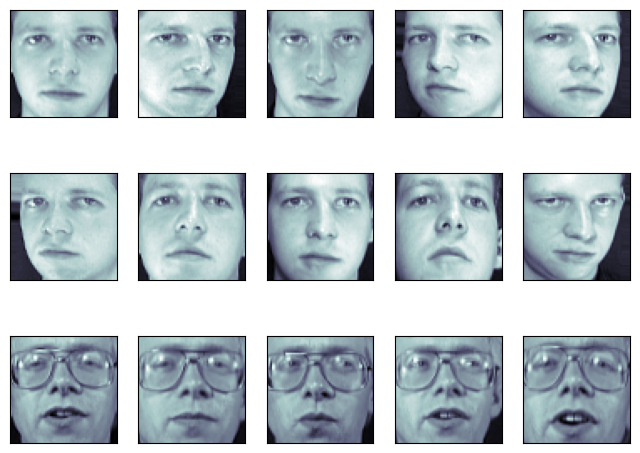

In [8]:
## LOAD DATA
faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
print(faces.images.shape)

## PLOT DATA SAMPLES
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = plt.subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [9]:
## SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.59


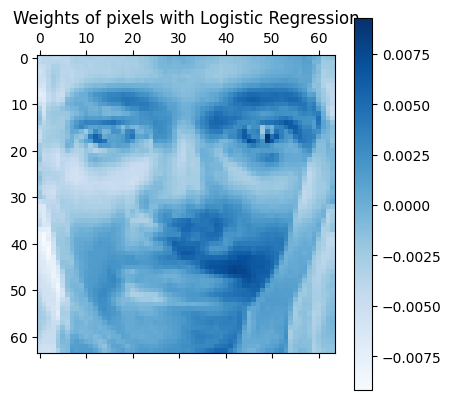

In [10]:
## LOGISTIC REGRESSION USIG INTENSITY OF ALL PIXELS AS INPUT FEATURES
log_reg=LogisticRegression(penalty=None,solver='saga', tol=0.1, multi_class='multinomial')

log_reg.fit(X_train, y_train)

class_est = log_reg.predict(X_test)

acc=np.sum(class_est==y_test)/y_test.shape[0]

print('Accuracy: %0.2f' % acc)

# Plot weights
weights = log_reg.coef_[0].reshape(faces.images[0].shape)
plt.matshow(weights, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Weights of pixels with Logistic Regression")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.63
Number of coefficients eliminated 0
Percentage of coefficients eliminated 0.0000


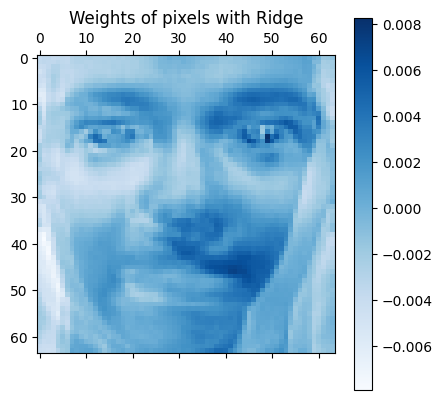

In [11]:
## RIDGE REGRESSION

log_reg=LogisticRegression(penalty='l2', C=1, solver='saga', tol=0.1, multi_class='multinomial')

log_reg.fit(X_train, y_train)

class_est = log_reg.predict(X_test)

acc=np.sum(class_est==y_test)/y_test.shape[0]
print('Accuracy: %0.2f' % acc)
print('Number of coefficients eliminated %d' % np.sum(log_reg.coef_[0]==0))
print('Percentage of coefficients eliminated %.4f' % (np.sum(log_reg.coef_[0]==0)/(64*64)))

weights = log_reg.coef_[0].reshape(faces.images[0].shape)
plt.matshow(weights, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Weights of pixels with Ridge")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.44
Number of coefficients eliminated 2174
Percentage of coefficients eliminated 0.5308


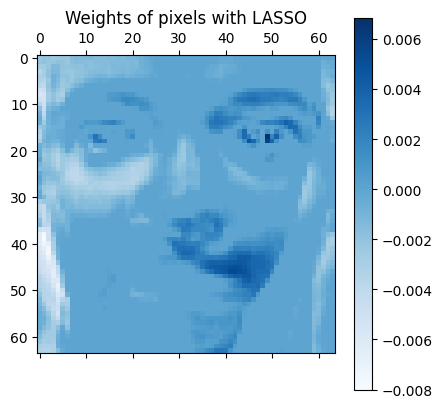

In [12]:
## LASSO REGRESSION
log_reg=LogisticRegression(penalty='l1', C=3, solver='saga', tol=0.1, multi_class='multinomial')

log_reg.fit(X_train, y_train)

class_est = log_reg.predict(X_test)

acc=np.sum(class_est==y_test)/y_test.shape[0]
print('Accuracy: %0.2f' % acc)
print('Number of coefficients eliminated %d' % np.sum(log_reg.coef_[0]==0))
print('Percentage of coefficients eliminated %.4f' % (np.sum(log_reg.coef_[0]==0)/(64*64)))

weights = log_reg.coef_[0].reshape(faces.images[0].shape)
plt.matshow(weights, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Weights of pixels with LASSO")
plt.show()

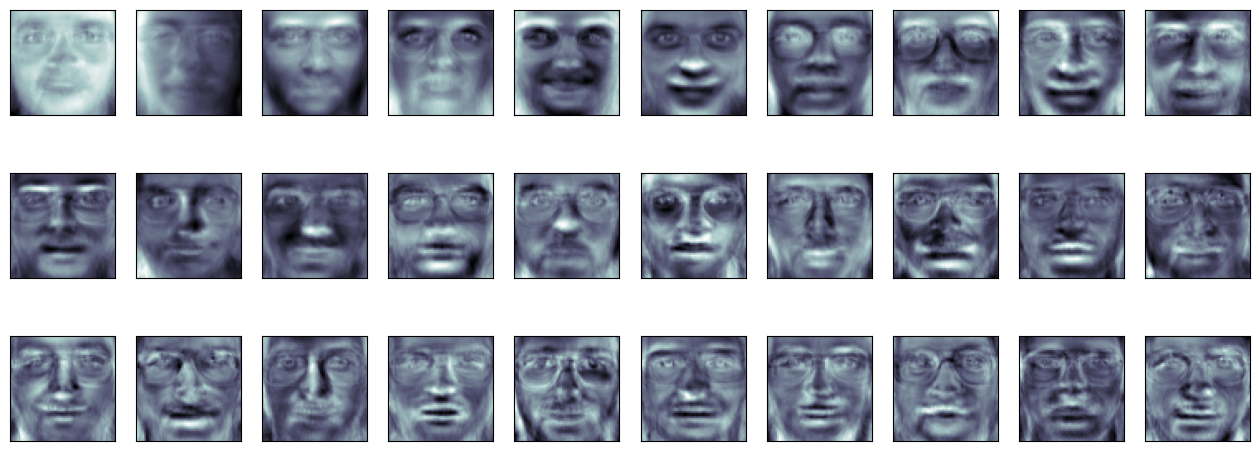

In [13]:
## PCA
## Estimating PCA transformation on the training set
# Applying the (same!) transformation to the training and test set

N_components=150
pca = decomposition.PCA(n_components=N_components, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#Plot the first eigenfaces
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of logistic regression with PCA: 0.93
Number of components 150
Percentage of coefficients eliminated 0.9634


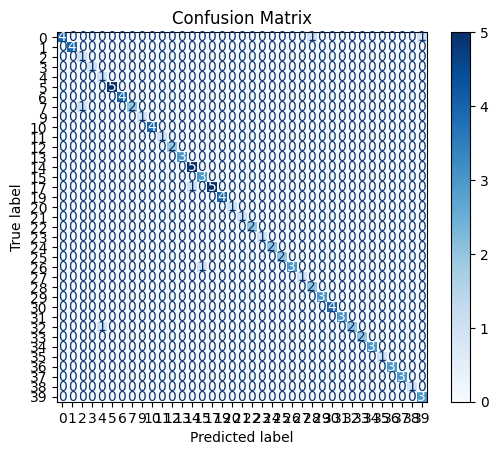

In [29]:
# Assuming logistic regression and PCA steps are already done
log_reg = LogisticRegression(penalty=None, solver='saga', tol=0.1, multi_class='multinomial')
log_reg.fit(X_train_pca, y_train)

# Predictions
class_est = log_reg.predict(X_test_pca)

# Accuracy calculation
acc = np.sum(class_est == y_test) / y_test.shape[0]
print('Accuracy of logistic regression with PCA: %0.2f' % acc)
print('Number of components %d' % N_components)
print('Percentage of coefficients eliminated %.4f' % ((64*64 - N_components) / (64*64)))

# Confusion matrix and plot
cm = confusion_matrix(y_test, class_est, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Text(0, 0.5, 'Fraction of variance explained')

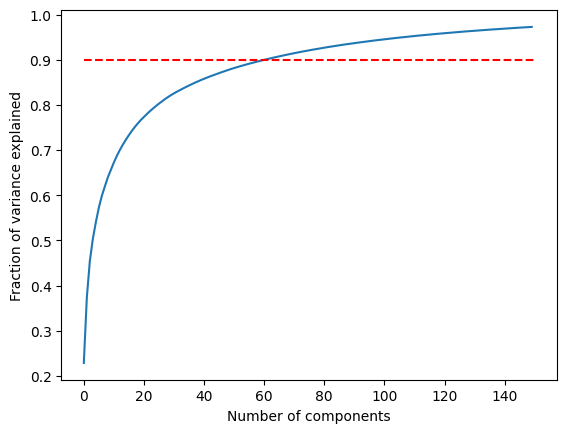

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot([0,N_components],[0.9,0.9],'--r')
plt.xlabel('Number of components')
plt.ylabel('Fraction of variance explained')

##Homework

How many components would you use to explain 90% of the
total variance of the data?

In [31]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assume X is your dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # Standardize the data

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Find the number of components that explain 90% of the variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1  # +1 because index is zero-based
print(f"Number of components explaining 90% variance: {num_components_90}")


Number of components explaining 90% variance: 61


number of components that are able to explain 10%,
25%, 50%, 75%, and 90% of the total variance of the data

In [32]:
# Define the target variance thresholds
variance_targets = [0.10, 0.25, 0.50, 0.75, 0.90]

# Find the number of components for each target
components_per_variance = {target: np.argmax(cumulative_variance >= target) + 1 for target in variance_targets}

print("Number of components for each variance target:", components_per_variance)


Number of components for each variance target: {0.1: 1, 0.25: 1, 0.5: 4, 0.75: 18, 0.9: 61}


Train and test a logistic regression classifier on the different
number of principal components, and evaluate the
different accuracies.

In [46]:
# Split the dataset into training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Evaluate logistic regression with different numbers of components
accuracies = {}
for target, n_components in components_per_variance.items():
    # Apply PCA with n_components
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_split)
    X_test_pca = pca.transform(X_test_split)

    # Train logistic regression
    log_reg = LogisticRegression(penalty=None, solver='saga', tol=0.1, multi_class='multinomial')
    log_reg.fit(X_train_pca, y_train_split)

    # Test logistic regression and compute accuracy
    y_pred = log_reg.predict(X_test_pca)
    acc = accuracy_score(y_test_split, y_pred)
    accuracies[target] = acc
    print(f"Accuracy with {n_components} components explaining {target*100:.0f}% variance: {acc:.2f}")

# Summary of accuracies
print("\nAccuracies for different variance thresholds:")
for target, acc in accuracies.items():
    print(f"{target*100:.0f}% variance: {acc:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy with 1 components explaining 10% variance: 0.02
Accuracy with 1 components explaining 25% variance: 0.02
Accuracy with 4 components explaining 50% variance: 0.17


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy with 18 components explaining 75% variance: 0.69
Accuracy with 61 components explaining 90% variance: 0.83

Accuracies for different variance thresholds:
10% variance: 0.02
25% variance: 0.02
50% variance: 0.17
75% variance: 0.69
90% variance: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Train an autoencoder and use the encoder as a feature extractor

In [36]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 50  # Example size of the latent space

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=256, shuffle=True)

# Use the encoder as a feature extractor
X_train_latent = encoder.predict(X_train)
X_test_latent = encoder.predict(X_test)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 578ms/step - loss: 1.2415
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2224 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1469 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0533 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9920 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9503 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9204 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8968 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8829 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8722 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8645
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8517 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8415 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8359 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8319 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━

Train a logistic classifier on the latent space of the autoencoder

In [37]:
# Train a logistic regression classifier on the latent space
clf_latent = LogisticRegression(max_iter=1000)
clf_latent.fit(X_train_latent, y_train)

# Test the classifier
y_pred_latent = clf_latent.predict(X_test_latent)
accuracy_latent = accuracy_score(y_test, y_pred_latent)
print(f"Accuracy using the autoencoder latent space: {accuracy_latent}")


Accuracy using the autoencoder latent space: 0.85


Compare the performance of the classifier trained on PCA components vs the autoencoder latent space

In [39]:
# Compare accuracies between PCA and Autoencoder
print(f"Accuracy with PCA: {accuracies[num_components_90]}")
print(f"Accuracy with Autoencoder: {accuracy_latent}")

Accuracy with PCA: 0.9666666666666667
Accuracy with Autoencoder: 0.85


Change the latent space size based on PCA results

In [40]:
# Modify latent space to match PCA components
encoding_dim = components_per_variance[0.90]  # Set the latent space size to match the PCA components
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Recreate and retrain the autoencoder
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=256, shuffle=True)

# Use the encoder to extract features and evaluate performance
X_train_latent = encoder.predict(X_train)
X_test_latent = encoder.predict(X_test)

clf_latent.fit(X_train_latent, y_train)
y_pred_latent = clf_latent.predict(X_test_latent)
accuracy_latent_modified = accuracy_score(y_test, y_pred_latent)
print(f"Accuracy with modified latent space: {accuracy_latent_modified}")


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 310ms/step - loss: 0.7244
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7210 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7226 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7162 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7117 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7076 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7053 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7087 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7056 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7049 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6969
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6925 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6984 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6891 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6935 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━